In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")

In [3]:
data.shape

(5572, 5)

In [4]:
data.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5453,ham,Except theres a chick with huge boobs.,NaN,NaN,NaN
3952,spam,Refused a loan? Secured or Unsecured? Can't ge...,NaN,NaN,NaN
4663,ham,Mum not going robinson already.,NaN,NaN,NaN
4471,spam,3. You have received your mobile content. Enjoy,NaN,NaN,NaN
1080,ham,You tell what happen dont behave like this to ...,NaN,NaN,NaN
1821,ham,I couldn't say no as he is a dying man and I f...,NaN,NaN,NaN


## 1. Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# very less non-null values in last 3 columns, so they are of no use. Dropping them
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# renaming the cols
data.rename(columns={'v1':'target','v2':'text'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# We need 1 in place of spam, and 0 in place of ham. So using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
encoder.fit_transform(data['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
data['target'] = encoder.fit_transform(data['target'])
data.sample(10)

,target,text
5038,0,Pls clarify back if an open return ticket that...
3903,1,Your 2004 account for 07XXXXXXXXX shows 786 un...
1526,0,"Wow ... I love you sooo much, you know ? I can..."
5349,0,I'm home...
381,0,"Yeah sure, give me a couple minutes to track d..."
5499,0,Now get step 2 outta the way. Congrats again.
1731,0,Lol. Well quality aint bad at all so i aint co...
1398,0,No did you check? I got his detailed message now
4064,0,Dont kick coco when he's down
5234,0,Ok cool. See ya then.


In [12]:
# check for missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# No missing values, Now check for duplicate values
data.duplicated().sum()

403

In [14]:
# There are 403 duplicates, so we need to remove them
data = data.drop_duplicates(keep='first')

In [15]:
data.duplicated().sum()

0

In [16]:
# Cleaned data having no duplicates and missing values
data.shape

(5169, 2)

## 2.EDA (Exploratory Data Analysis) for better understanding about *data*

In [17]:
# Count what % of data is spam or ham
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

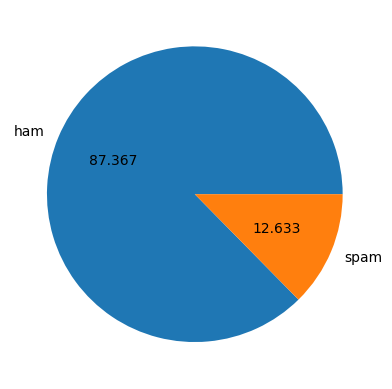

In [18]:
# As we can see data is very imbalanced, spam texts are only 12%, so we need to keep this in mind
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [19]:
# Now we can count number of alphabets, words or sentence in each sms. For this we will be needing nltk library
!pip install nltk

In [20]:
import nltk

In [21]:
# just for downloading essential dependencies for nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
# we will be creating 3 columns, 1 for number of characters, 2nd for no of words and 3rd for number of sentences in each sms.
data['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [23]:
# 1st column num_chars
data['num_chars'] = data['text'].apply(len)

In [24]:
data.sample(10)

,target,text,num_chars
3937,0,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...,158
4792,0,Or u ask they all if next sat can a not. If al...,84
5265,0,Gud ni8.swt drms.take care,26
2612,0,Yes. It's all innocent fun. O:-),32
5431,0,If I was I wasn't paying attention,34
3738,0,Did you stitch his trouser,26
2140,0,After the drug she will be able to eat.,39
1220,1,No. 1 Nokia Tone 4 ur mob every week! Just txt...,143
191,0,I'm sorry. I've joined the league of people th...,185
9,1,Had your mobile 11 months or more? U R entitle...,154


In [25]:
# 2nd column num_words
data['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [26]:
data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [27]:
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
data.sample(10)

,target,text,num_chars,num_words
5222,0,5 nights...We nt staying at port step liao...T...,51,13
4296,1,thesmszone.com lets you send free anonymous an...,138,27
3723,1,"Hi there, 2nights ur lucky night! Uve been inv...",156,28
2949,0,Where are you ? You said you would be here whe...,62,17
5267,0,Anything lar then Ì_ not going home 4 dinner?,45,10
3963,0,"If e timing can, then i go w u lor...",37,12
2920,0,"Yo, any way we could pick something up tonight?",47,11
315,0,K.k:)advance happy pongal.,26,7
3300,1,RCT' THNQ Adrian for U text. Rgds Vatian,40,10
4163,0,"Its ok, called mom instead have fun",35,8


In [29]:
# 3rd column num_sent
data['num_sent'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
data.sample(10)

,target,text,num_chars,num_words,num_sent
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
1411,0,somewhere out there beneath the pale moon ligh...,144,28,1
4621,0,They finally came to fix the ceiling.,37,8,1
103,0,wow. You're right! I didn't mean to do that. I...,183,44,5
2448,0,Do u knw dis no. &lt;#&gt; ?,28,14,2
1366,0,Bbq this sat at mine from 6ish. Ur welcome 2 come,49,12,2
2817,0,Thk some of em find wtc too far... Weiyi not g...,123,32,1
5228,1,PRIVATE! Your 2003 Account Statement for <fone...,146,27,3
1423,0,Lol great now im getting hungry.,32,7,1
2787,0,"Forgot it takes me 3 years to shower, sorry. W...",78,18,2


In [31]:
# Now let's analyze meam, median etc on all the 3 columns
data[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# let's analyze ham and spam separately
# for ham "data['target'] == 0"
data[data['target'] == 0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# for spam messages
data[data['target'] == 1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
# After seeing above analysis, we can get idea how spam and ham messages are different. On an average, number of chars, words or sentences are greater
# in spam messages than ham messages

In [35]:
# we can plot the above analysis using seaborn
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

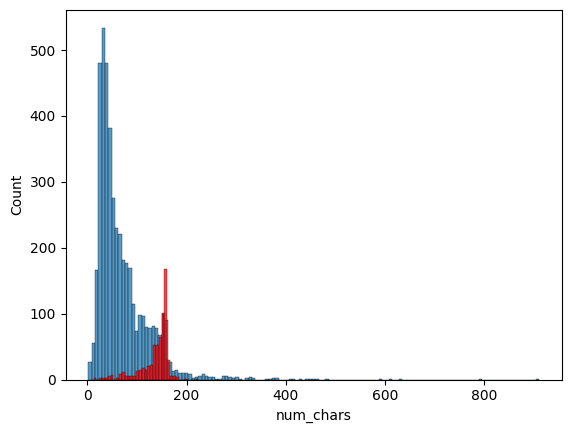

In [36]:
sns.histplot(data[data['target'] == 0]['num_chars'])
sns.histplot(data[data['target'] == 1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

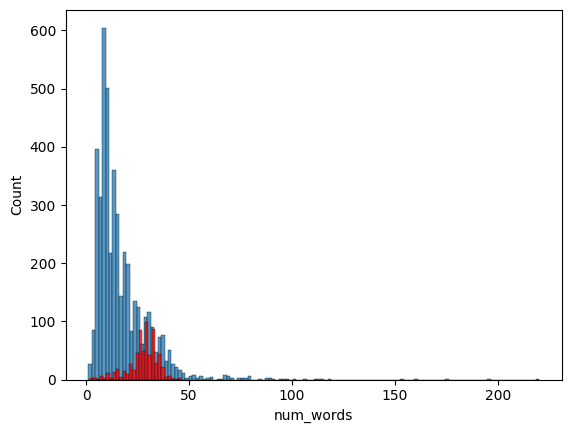

In [37]:
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

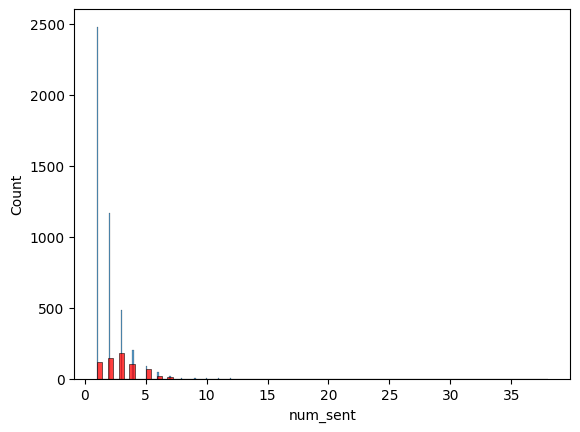

In [38]:
sns.histplot(data[data['target'] == 0]['num_sent'])
sns.histplot(data[data['target'] == 1]['num_sent'],color='red')

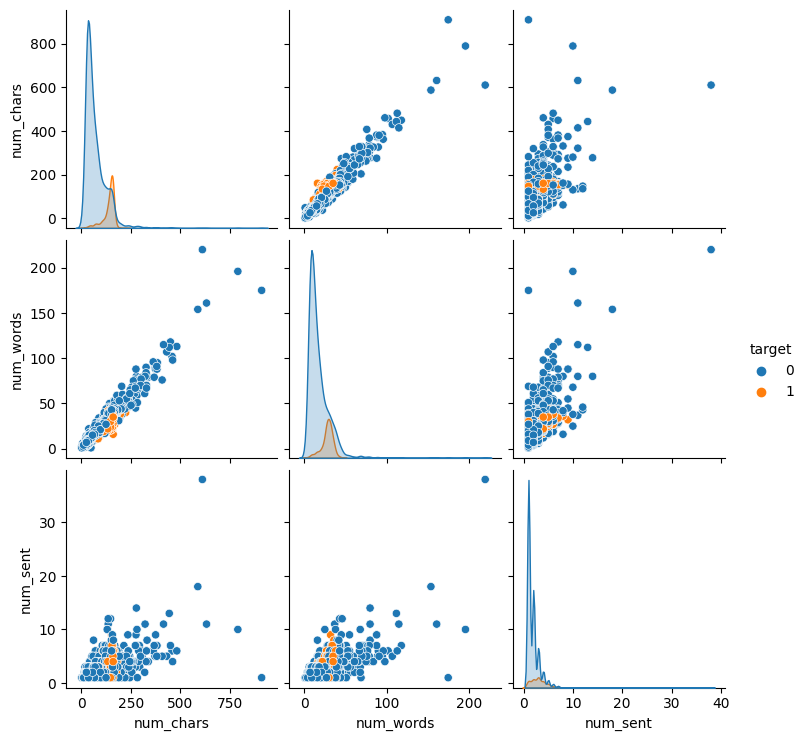

In [39]:
# correlation between 3 colums
sns.pairplot(data, hue='target')

In [40]:
# correlation coefficient
data.corr()

<ipython-input-40-2b8bd0afb3aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_chars,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<ipython-input-41-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

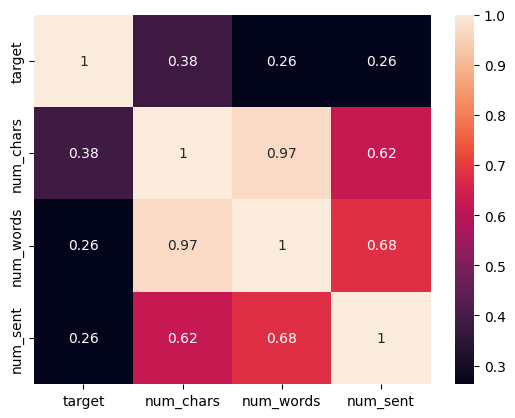

In [41]:
sns.heatmap(data.corr(),annot=True)

In [42]:
# nums_char have 0.38 correlation with target, so we will be using this column. We can't take all three columns because there are strong correlation between them.

## 3. Data Preprocessing (lower case, tokenization, removing special characters, stopwords and punctuation marks, stemming)

In [43]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('sexting')

'sext'

In [45]:
def transform_text(text):
    text = text.lower()  # lowercase
    text = nltk.word_tokenize(text) # tokenizing each word

    #removing special characters
    y = []
    for i in text:
        if i.isalnum():  #if alpha_numeric
            y.append(i)

    text = y[:]
    y.clear()

    # removing stopping words and punctuation marks
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # Stemming
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [46]:
transform_text("dsjf dfuids sdf reading cdsfuh. df i am dhsfds * dfd ss^^ xcvsd dsfs dff")

'dsjf dfuid sdf read cdsfuh df dhsfd dfd xcvsd dsf dff'

In [47]:
data['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [48]:
data['transformed_text'] = data['text'].apply(transform_text)

In [49]:
data.sample(10)

,target,text,num_chars,num_words,num_sent,transformed_text
3354,0,Minimum walk is 3miles a day.,29,7,1,minimum walk 3mile day
4093,0,how are you? I miss you!,24,8,2,miss
2622,0,Ok lor...,9,3,1,ok lor
2427,0,Do you think i can move &lt;#&gt; in a week,45,16,1,think move lt gt week
5018,0,Great! How is the office today?,31,8,2,great offic today
4725,0,Jason says it's cool if we pick some up from h...,70,17,1,jason say cool pick place like hour
779,0,That means get the door,23,5,1,mean get door
3065,1,Get a brand new mobile phone by being an agent...,121,28,3,get brand new mobil phone agent mob plu load g...
1000,0,No..but heard abt tat..,23,7,1,heard abt tat
3417,1,LIFE has never been this much fun and great un...,136,32,4,life never much fun great came made truli spec...


In [50]:
# word cloud shows important words in sms in bigger format
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [51]:
# for spam texts
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

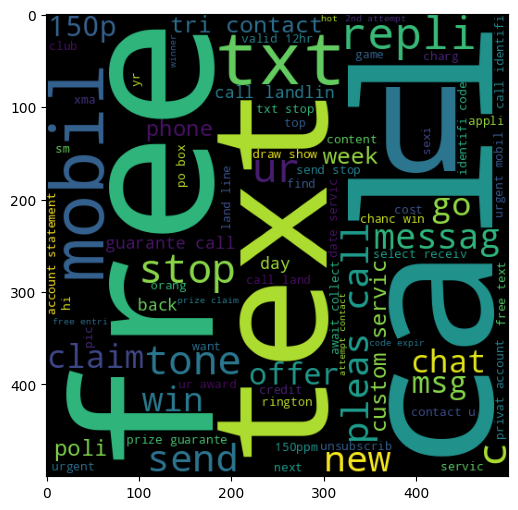

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

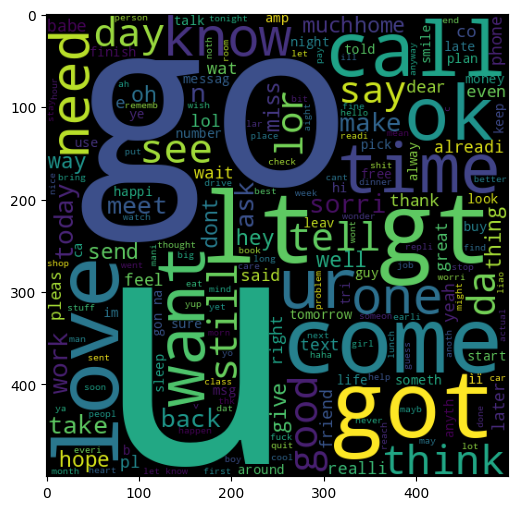

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
# Now let's focus on top 30 words used in spam and ham

In [56]:
spam_corpus = []
for text in data[data['target'] == 1]['transformed_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)

# spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

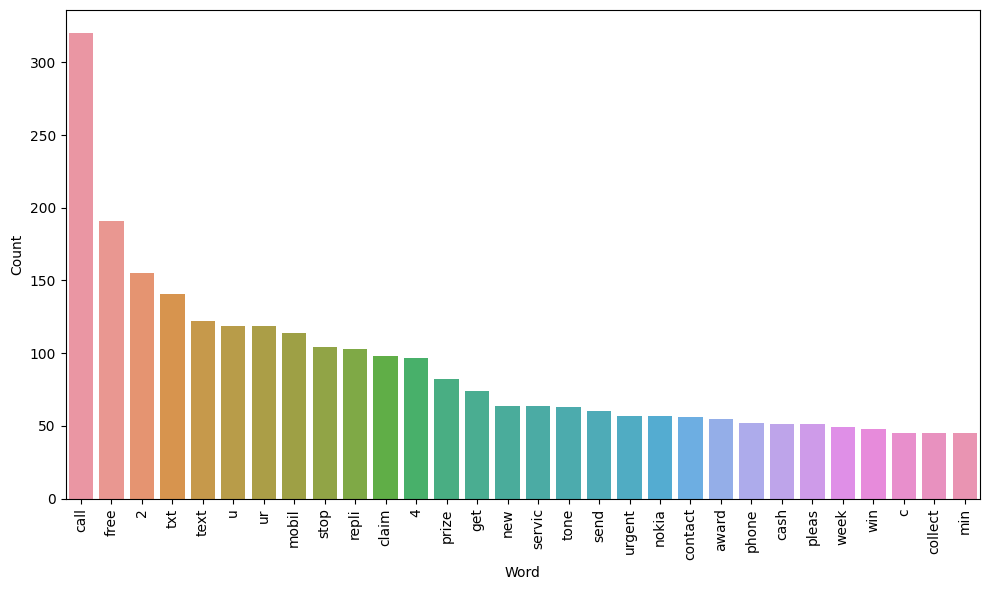

In [57]:
from collections import Counter
spam_counter = Counter(spam_corpus)
most_common_words = spam_counter.most_common(30)

# Creating a DataFrame from the Counter output
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Using Seaborn to create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [58]:
# For ham messages
ham_corpus = []
for text in data[data['target'] == 0]['transformed_text'].tolist():
    for word in text.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

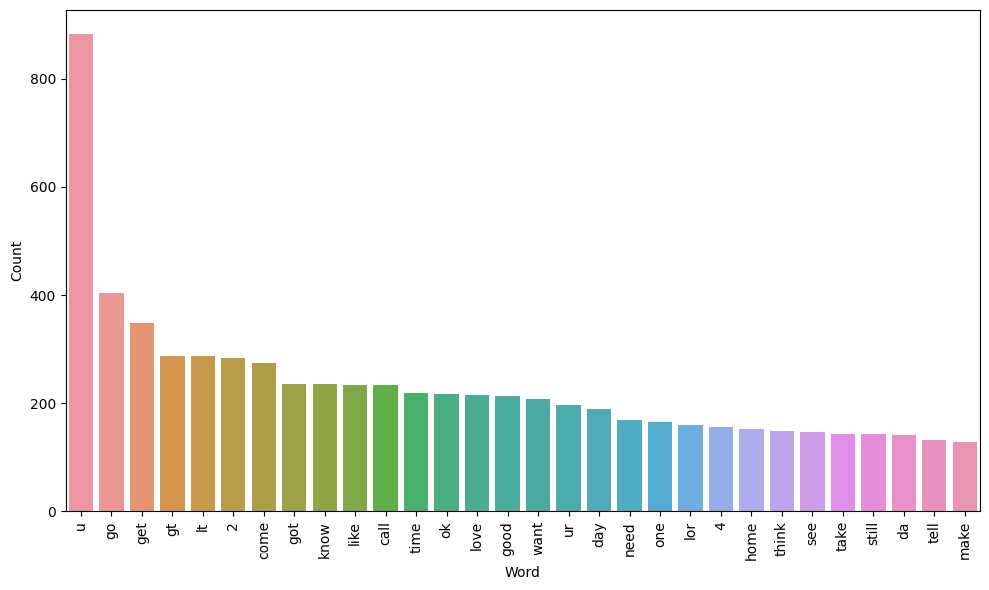

In [59]:
ham_counter = Counter(ham_corpus)
most_common_words = ham_counter.most_common(30)

# Creating a DataFrame from the Counter output
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Using Seaborn to create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

## 4. Model Building

In [60]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [61]:
data['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

In [62]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [63]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)  # 20% test size

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [70]:
# precision score is very less, so above GaussianNB is performing not well;

In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [72]:
# precision score is still not good, since imbalanced data so accuracy will not matter as precision score

In [73]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [74]:
# So as of now Bernaulli NB is performing really well

In [172]:
# Now let's use TFIDF instead of Bag of words to convert text to numerical
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)  # Improvement 1

In [173]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [174]:
# from sklearn.preprocessing import MinMaxScaler # Improvement 2
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [175]:
# appending the num_character col to X  -> Improvement 3
# X = np.hstack((X,data['num_chars'].values.reshape(-1,1)))

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)  # 20% test size

In [177]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [178]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [179]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [180]:
# Now precision score is 1 which is very good.

In [181]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [182]:
# So now we have option to go with either BNB or MNB, sice accuraccy is not of much interest in case of imbalanced data, so we will
# go with MNB since it has high precision i.e we are going with TFIDF & MNB

In [183]:
# Now lets try other ML models and compare with MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [184]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [185]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [186]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [187]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [188]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0

For  NB
Accuracy -  0.9709864603481625
Precision -  1.0

For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283

For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703

For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829

For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089

For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659

For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406

For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192

For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333



In [189]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [190]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [191]:
# Model Improvement
#  1. Changing max_features parametere of TFIDF vectorizer (max_features(2000) means we are choosing 2000 most used words in sms)
#  2. Scaling input feature vector X
#  3. Appending num_chars column to X

In [192]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [193]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [146]:
# We can compare both the scenarios above, Accuracy of NB increased to 97.09% and also the precision is 1, so we will be using max_features parameter 3000 for TFIDF

In [144]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [145]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
7,xgb,0.970019,0.934959,0.967118,0.933333,0.967118,0.933333
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


In [ ]:
# As we can see accuracies might have increased slightly but precision goes down too much. So we will not be considering Scaling

In [164]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [165]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.932302,0.814815
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.961315,0.962264
7,xgb,0.970019,0.934959,0.967118,0.933333,0.967118,0.933333,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.951644,0.931373
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225


In [194]:
# In this case also, we are not getting any improvements. so we will not nconsider this.
# As of now, in case of max_features, we are getting best accuracy and precision

In [195]:
# Voting Classifier  for creating the combination of best performing models
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [196]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [197]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [198]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [199]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [200]:
# We can see after using voting classifier, we are getting slightly better accuracy but precision reduces.
# So we will not be considering coting classifier.

In [203]:
# Applying stacking  -> It is similar to voting, the only difference is that in voting, each combo of algo get same weightage but in stacking, we
# weightage is decided using final_estimator
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [204]:
from sklearn.ensemble import StackingClassifier

In [205]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [206]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [207]:
# As we can see, in this case also we are not getting something better.

# So we will go with MNB with TFIDF vectorizer having max_features 3000

In [208]:
# dumping model and vectorizer
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))